<a href="https://colab.research.google.com/github/charithaponduru/Task3Spark/blob/master/Task3Sparks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task #3 - To Explore Unsupervised Machine Learning**


*   From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
*   Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing





In [1]:
#Mounting from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import datasets

iris = datasets.load_iris()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Printing dataset
iris_df=pd.read_csv('/content/drive/My Drive/Iris.csv')
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Exploring the dataset
iris_df.shape

(150, 6)

In [8]:
#Exploring the dataset
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#Checking the missing values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
#Defining target and predictor
x = iris.data[:, :2]
y = iris.target

Text(0, 0.5, 'Sepal Width')

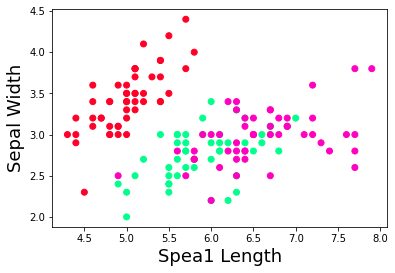

In [14]:
#Visualizing data using Scatter Plot
plt.scatter(x[:,0], x[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [15]:
#Kmeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [16]:
#Identifying Centroids
centroids = km.cluster_centers_
print(centroids)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


In [17]:
#Hence, there are 150 rows and 6 columns.
iris_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 16.3 KB


In [18]:
#checking correlation between columns
iris_df.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


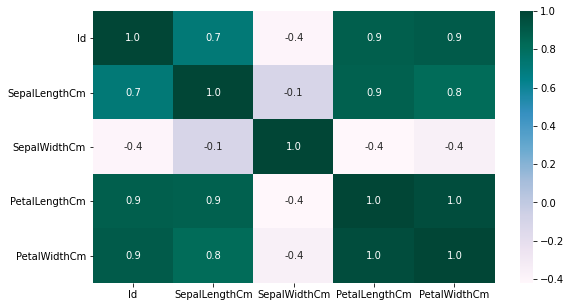

In [19]:
#Checking correlation between columns visually
f,ax = plt.subplots(figsize=(9, 5))
sns.heatmap(iris_df.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="PuBuGn")

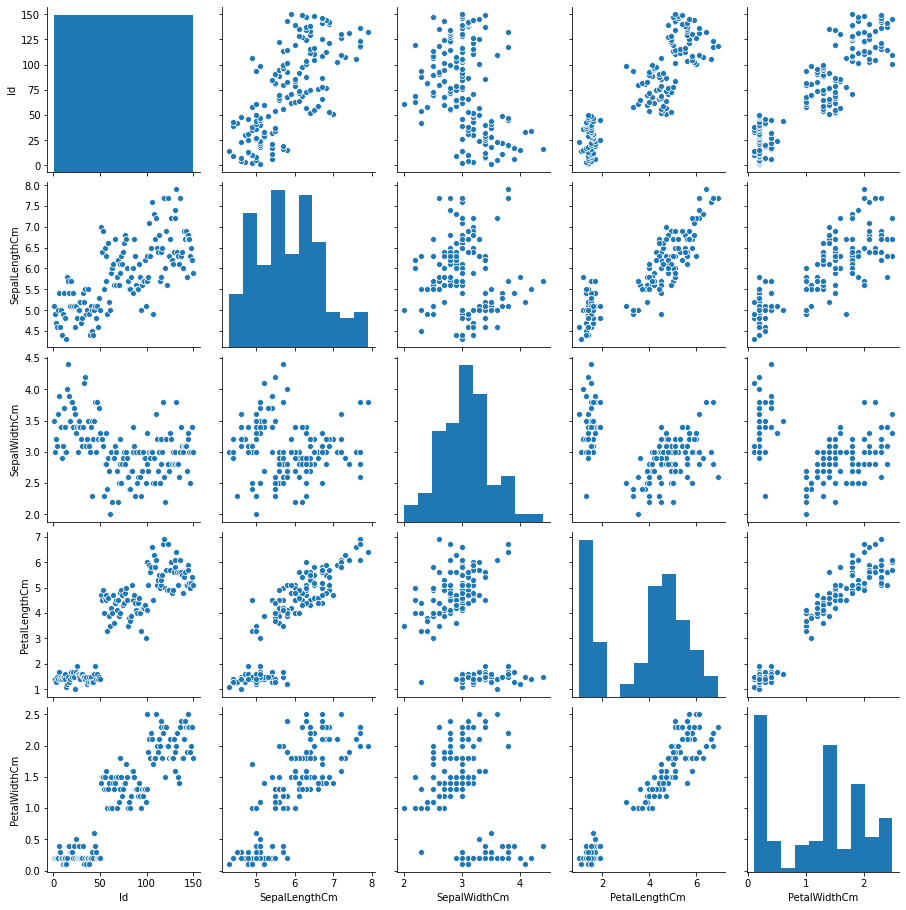

In [20]:
sns.pairplot(iris_df)

Text(0.5, 1.0, 'Elbow Method Visualisation')

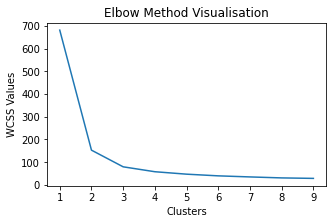

In [21]:
#Implementing the elbow method
from sklearn.cluster import KMeans
wcss=[]
K_rng=10

for i in range(1,K_rng):
    K=KMeans(i)
    K.fit(df)
    w=K.inertia_
    wcss.append(w)
    
Clusters=range(1,K_rng)
plt.figure(figsize=(5,3))
plt.plot(Clusters,wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS Values') #Within Cluster Sum of Squares
plt.title('Elbow Method Visualisation')

In [22]:
#Fitting the model
K2= KMeans(2)
K2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
#renaming the columns to ease further operations
df.columns=['Sepal_length','Sepal_width','Petal_length','Petal_width']

In [26]:
#Prediction using the model
iris_pred=df.copy()
iris_pred['Predicted']=K2.fit_predict(df)

Text(0.5, 1.0, 'Sepal_length vs Sepal_width(K=2)')

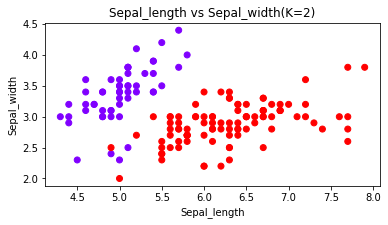

In [27]:
#Visualise the clusters (Sepal features) after prediction
plt.figure(figsize=(6,3))
plt.scatter(iris_pred['Sepal_length'], iris_pred['Sepal_width'], c=iris_pred['Predicted'], cmap = 'rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Sepal_width(K=2)')

Text(0.5, 1.0, 'Petal_length vs Petal_width(K=2)')

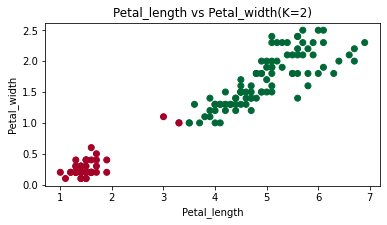

In [28]:
#Visualise the clusters (Petal features) after prediction
plt.figure(figsize=(6,3))
plt.scatter(iris_pred['Petal_length'], iris_pred['Petal_width'], c=iris_pred['Predicted'], cmap = 'RdYlGn')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.title('Petal_length vs Petal_width(K=2)')

In [29]:
#Fitting the model
K3= KMeans(3)
K3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
#Prediction using the model
iris_pred2=df.copy()
iris_pred2['Predicted']=K3.fit_predict(df)

Text(0.5, 1.0, 'Sepal_length vs Sepal_width(K=3)')

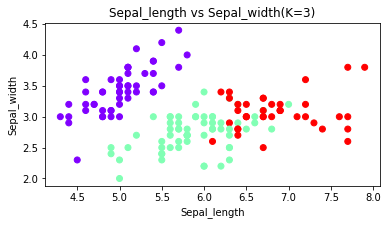

In [31]:
#Visualise the clusters (Sepal features) after prediction
plt.figure(figsize=(6,3))
plt.scatter(iris_pred2['Sepal_length'], iris_pred2['Sepal_width'], c=iris_pred2['Predicted'], cmap = 'rainbow')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.title('Sepal_length vs Sepal_width(K=3)')

Text(0.5, 1.0, 'Petal_length vs Petal_width(K=3)')

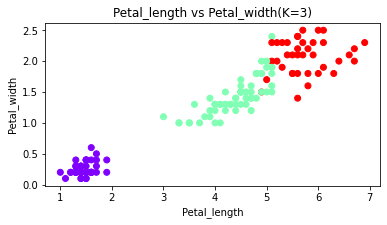

In [32]:
#Visualise the clusters (Petal features) after prediction
plt.figure(figsize=(6,3))
plt.scatter(iris_pred2['Petal_length'], iris_pred2['Petal_width'], c=iris_pred2['Predicted'], cmap = 'rainbow')
plt.xlabel('Petal_length')
plt.ylabel('Petal_width')
plt.title('Petal_length vs Petal_width(K=3)')

In [33]:
#Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

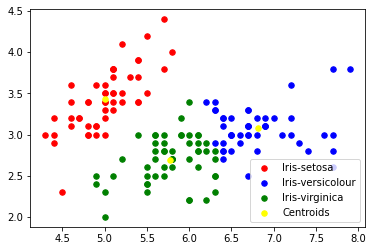

In [34]:

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')
#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'yellow', label = 'Centroids')
plt.legend()

**Result:**




*   After considering the values of K=2 or 3; we can conclude from above visualisations that 3 is the optimum value of K in this Iris dataset.

*   It can also be said that Petal features are better to recognise the clusters than the Sepal features.



